In [5]:
import pandas as pd
import seaborn as sb

In [6]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [7]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [8]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [9]:
data['Date/Time']

0        2014-04-01 00:11:00
1        2014-04-01 00:17:00
2        2014-04-01 00:21:00
3        2014-04-01 00:28:00
4        2014-04-01 00:33:00
                 ...        
564511   2014-04-30 23:22:00
564512   2014-04-30 23:26:00
564513   2014-04-30 23:31:00
564514   2014-04-30 23:32:00
564515   2014-04-30 23:48:00
Name: Date/Time, Length: 564516, dtype: datetime64[ns]

In [10]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [11]:
data

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1
...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30


In [12]:
def get_weekday(dt):
    return dt.weekday()

data['Weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour

data['Hour'] = data['Date/Time'].map(get_hour)

In [13]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


In [14]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency/No of trips')

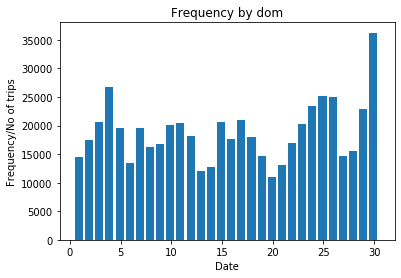

In [15]:
plt.hist(data.dom, bins=30, width = 0.8, range=(0.5,30.5))
plt.title('Frequency by dom')
plt.xlabel('Date')
plt.ylabel('Frequency/No of trips')

In [16]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

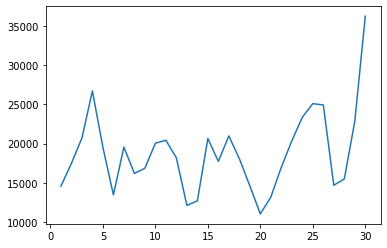

In [17]:
plt.plot(by_date)

<BarContainer object of 30 artists>

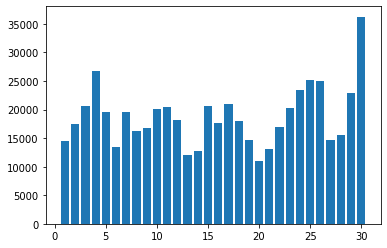

In [18]:
plt.bar(range(1,31),by_date)

In [19]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

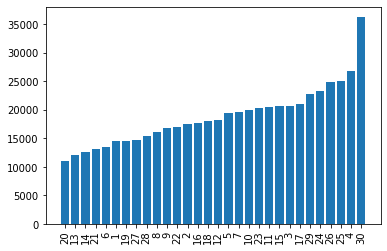

In [20]:
plt.bar(range(1,31), by_date_sorted)
plt.xticks(range(1,31),by_date_sorted.index, rotation='vertical')
plt.show()

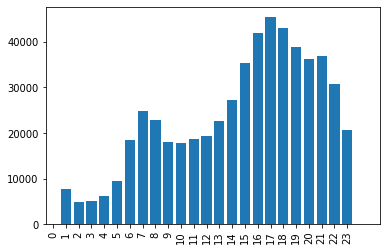

In [21]:
plt.hist(data.Hour, bins=24, range=(0.5,24.5), rwidth=0.8)
plt.xticks(range(0,24), rotation='vertical')
plt.show()

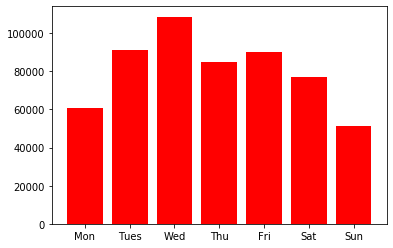

In [22]:
plt.hist(data.Weekday, bins=7, range=(-0.5,6.5), color = 'red', rwidth=0.8)
plt.xticks(range(7), 'Mon Tues Wed Thu Fri Sat Sun'.split())
plt.show()

In [23]:
count_rows(data)

564516

In [24]:
by_cross = data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()
by_cross

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


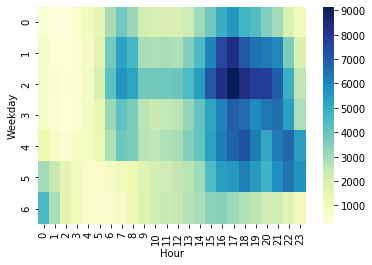

In [25]:
sb.heatmap(by_cross, cmap='YlGnBu')
plt.show()

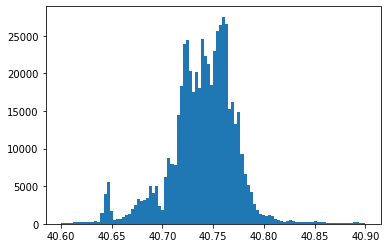

In [26]:
plt.hist(data.Lat, bins=100, range=(40.6,40.9))
plt.show()

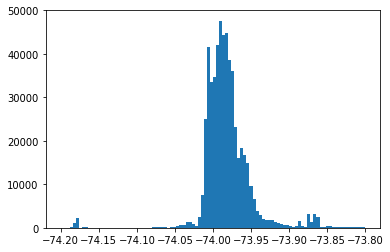

In [27]:
plt.hist(data.Lon, bins=100,range=(-74.2,-73.8))
plt.show()

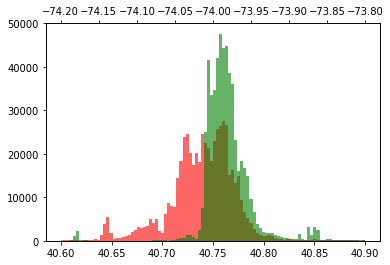

In [28]:
plt.hist(data.Lat, bins=100, range=(40.6,40.9), color='r', alpha=0.6)
plt.twiny()
plt.hist(data.Lon, bins=100,range=(-74.2,-73.8), color= 'g', alpha= 0.6)
plt.show()

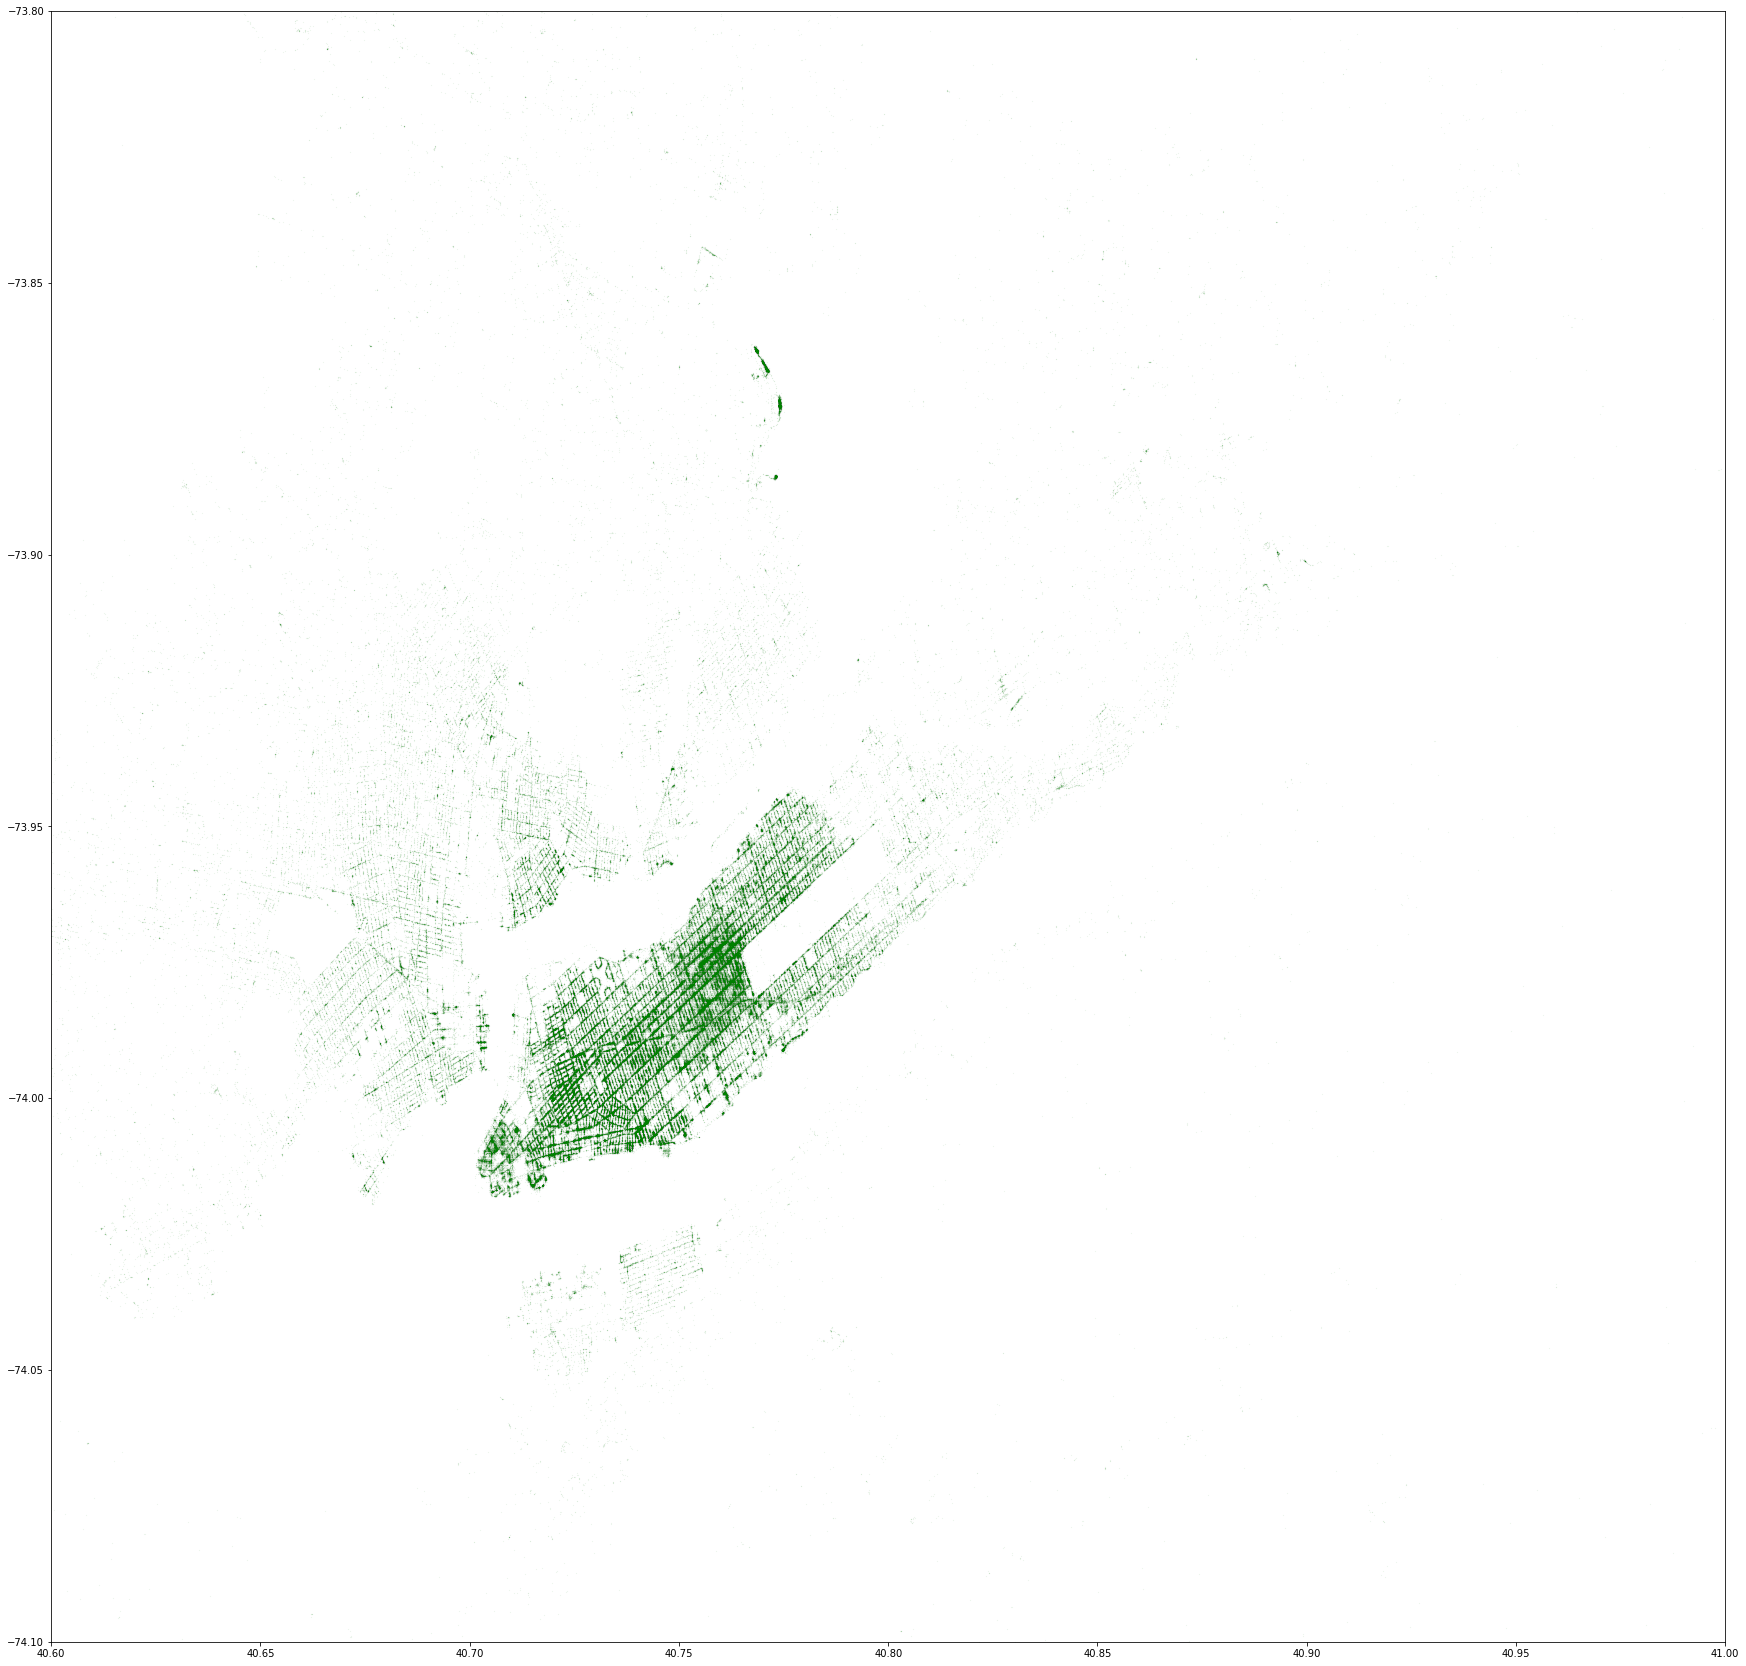

In [29]:
plt.figure(figsize=(30,30))
plt.plot(data['Lat'],data['Lon'],'.',ms=.1,color='green',alpha=0.5)
plt.ylim(-74.1, -73.8)
plt.xlim(40.6, 41)
plt.show()